# GROUP 2 EMERGING TREND IN SOFTWARE ENGINEERING
# AIMAN BIN AMIR - 52213225198
# AZANY DZIKRY BIN SAIFUL BAHRI - 52213124718
# Emeirul Ezzuddean bin Jefri - 52213124704

# Forest Tree Data Generation

This notebook simulates a forest grid (10x10 blocks) and generates trees with random properties such as location, species, diameter, height, and volume. It also assigns tree IDs and calculates volume based on group and diameter class.


In [1]:
import random
import csv
import numpy as np

## Define Group and Diameter Class


In [2]:

group_species = ["mersawa", "keruing", "Dip commercial", "Dip Non Commercial", "NonDip commercial", "NonDip Non Commercial", "Others"]
diameter_class = [(5, 15), (15, 30), (30, 45), (45, 60), (60, 100)]
total_trees = [
    [15, 12, 4, 2, 2],
    [21, 18, 6, 4, 4],
    [21, 18, 6, 4, 4],
    [30, 27, 9, 5, 3],
    [30, 27, 9, 4, 4],
    [39, 36, 12, 7, 4],
    [44, 42, 14, 9 ,4]
]
group_mapping = [(0, 0), (1, 4), (5, 11), (12, 18), (19, 58), (59, 315)]
species_list = [
    "PHDK", "CHBG", "CHBR", "CHTR", "CHMI", "CHRH", "CRMS", "KKMS", "KKPN", "LMBI",
    "PCEK", "TBEG", "KHOV", "KKDK", "KKKS", "KKTM", "PPEL", "RINM", "TRLT", "ANKM",
    "ATTT", "BENG", "BSNK", "CHBK", "CHKM", "CHKO", "CHKR", "CHLK", "CHMC", "CHTP",
    "DCSP", "DYKL", "HUDN", "KMPR", "KRAY", "KREL", "KRKO", "KRPM", "KRYS", "MASK",
    "NNON", "PRDL", "PRLO", "PRNG", "SKRM", "SMPN", "SRAL", "SRKR", "SRLO", "SROL",
    "SWPR", "SYCR", "TAUR", "TEPI", "THNR", "THNS", "TRTM", "TRYG", "TTRV", "ANKN",
    "ANKT", "ANOM", "ATNG", "BADM", "BAKG", "BDNG", "BELY", "BKSV", "BNKO", "BYPV",
    "CASA", "CCHB", "CHMK", "CHNY", "CHPL", "CHRK", "CHRM", "CHRS", "CHUT", "CKTM",
    "CREY", "DKOR", "DOKM", "HISN", "KAOM", "KCAS", "KDAG", "KDCH", "KDOL", "KES",
    "KKCM", "KKGN", "KKOM", "KNDL", "KNPR", "KRAG", "KRAS", "KRBO", "KRLA", "KRON",
    "KTOM", "KWAV", "LGNG", "MAKG", "MAKP", "MAKU", "MNPR", "NENS", "PANG", "PHNV",
    "PHON", "PHUT", "PLON", "PNAG", "PNGS", "POBY", "POCV", "POKH", "PONR", "PPTH",
    "PPUL", "PRPN", "PRUS", "PYPK", "RAIT", "ROKA", "RUNG", "SABL", "SARG", "SBMS",
    "SDAV", "SDEY", "SLEN", "SMCH", "SME", "SMKB", "SNAY", "SNOL", "SOUY", "SPOR",
    "SPPY", "SPTK", "SRKM", "SVAK", "SVCT", "SVPT", "TKOV", "TLOK", "TOLP", "TPOG",
    "TRAG", "TREN", "TRMN", "TRSK", "WYNG", "ACSA", "ADCH", "AKSL", "AMBB", "AMCN",
    "AMPI", "ANCH", "ANKB", "ANRD", "APEN", "ATES", "ATSR", "BAKK", "BAKP", "BBOK",
    "BOPR", "BRCH", "BTIL", "CABB", "CHCK", "CHEK", "CHHA", "CHHU", "CHKG", "CHKP",
    "CHKU", "CHLS", "CHNA", "CHNO", "CHOV", "CHPS", "CHTU", "CTES", "DAKD", "DGPR",
    "DKPO", "DNKY", "DRDV", "DYSP", "EPSH", "KACL", "KAKU", "KANA", "KANE", "KANT",
    "KATG", "KAYK", "KBAL", "KRORLORNG", "KBDA", "KBDK", "KBKK", "KCHP", "KDCE", "KDCK",
    "KHMA", "KHNH", "KHOS", "KHTN", "KHVG", "KKAL", "KKKK", "KKLG", "KLIG", "KLNG",
    "KLPO", "KMPT", "KNAL", "KNAY", "KODK", "KOKH", "KOMT", "KOMY", "KORK", "KOTT",
    "KRAK", "KREG", "KREM", "KRMN", "KROH", "KRSR", "KRUS", "KRVN", "KTIT", "LORT",
    "LORV", "LOVG", "LRLT", "MADN", "MDAS", "MMAG", "MTYK", "NGOK", "NHAM", "NIV",
    "ONLK", "PAGA", "PAGS", "PECH", "PHLG", "PHMA", "PHNO", "PHOR", "PLNG", "PLOG",
    "PLOK", "PLOR", "PLPH", "PMVG", "PNKP", "PNOM", "POCH", "POPL", "POUN", "PPPR",
    "PPVK", "PREL", "PROM", "RANG", "ROCG", "RODL", "ROML", "ROTY", "ROVN", "RPCK",
    "SADA", "SAHA", "SAND", "SANK", "SAVP", "SBTS", "SEMN", "SKPL", "SLCH", "SLET",
    "SLNG", "SOPI", "SREG", "SRMO", "TAPL", "TBOT", "TENG", "THME", "THNO", "THTR",
    "TMAK", "TNIV", "TOUK", "TRBL", "TRCU", "TREL", "TROG", "TRSK", "TRYA", "TRYG",
    "TTPY", "UNKN", "VEAY", "VOEG", "YEAM", "YOUK", "KHLG", "TRAC"
]

## Generate Forest Tree Data

Assumptions:

- If the group species does not have any local name at all then use group species name as the species name
- group 1-4 are dipterocarp


In [3]:
forest_generated = []

count = 0
for i in range(1, 11):  # For I = 1, 10           /* Block I */
    for j in range(1, 11):  # For j = 1,10            /* Block J */
        for g in range(len(group_species)):  # For Group G = 1,7
            for d in range(len(diameter_class)):  #  For Dclass = 1, 5
                trees_to_gen = total_trees[g][d]  #  NoTrees = Table[G, Dclass, NoTrees]
                # Generate Data
                for tree in range(trees_to_gen):  # For Tree = 1,NoTree
                    # Coordinate
                    # x = rand(0,99); coordX = (I-1)*100+x;
                    # y = rand(0,99); coordY = (J-1)*100+y;
                    x = random.randint(0, 99)
                    coordX = (i - 1) * 100 + x
                    y = random.randint(0, 99)
                    coordY = (j - 1) * 100 + y
                    # Species
                    # If the group species does not have any local name at all
                    # then use group species name as the species name
                    if g < len(group_mapping):
                        mapStrt, mapEnd = group_mapping[g]
                        species = species_list[random.randint(mapStrt, mapEnd)]
                    else:
                        species = group_species[g]

                    # Diameter class
                    diamStrt, diamEnd = diameter_class[
                        d
                    ]  # Dclass(Dclass, StartD, EndD);
                    diameter = (
                        random.randint(diamStrt * 10, diamEnd * 10) / 10
                    )  # diameter = rand(StartD*10, EndD*10)/10;
                    # Height
                    if d == 0:
                        height = random.randint(5, 10)
                    elif d == 1:
                        height = random.randint(11, 15)
                    elif d == 2:
                        height = random.randint(16, 20)
                    elif d == 3:
                        height = random.randint(21, 25)
                    elif d == 4:
                        height = random.randint(26, 30)

                    BlockX = f"{i:02}"
                    BlockY = f"{j:02}"
                    frmt_coordX = f"{coordX:03}"
                    frmt_coordY = f"{coordY:03}"

                    TreeNum = "T" + BlockX + BlockY + frmt_coordX + frmt_coordY

                    diameter_m = diameter / 100

                    if g in {0, 1, 2, 3}:  # assuming this group are dipterocarp
                        if diameter < 15:
                            volume = 0.022 + 3.4 * diameter_m * diameter_m
                        else:  # since ada height or length so just default guna formula yg guna length
                            volume = (
                                0.015
                                + 2.137 * diameter_m * diameter_m
                                + 0.513 * diameter_m * diameter_m * height
                            )
                    else:
                        if diameter < 30:
                            volume = 0.03 + 2.8 * diameter_m * diameter_m
                        else:
                            volume = (
                                -0.0023
                                + 2.942 * diameter_m * diameter_m
                                + 0.262 * diameter_m * diameter_m * height
                            )

                    default_status = "NO STATUS"
                    production = ""
                    cut_angle = ""
                    damage_stem = ""
                    damage_crown = ""
                    d30 = ""
                    vol30 = ""

                    # Store
                    tree_info = [
                        i,
                        j,
                        coordX,
                        coordY,
                        TreeNum,
                        species,
                        g + 1,
                        diameter,
                        height,
                        round(volume, 2),
                        default_status,
                        production,
                        cut_angle,
                        damage_stem,
                        damage_crown,
                        d30,
                        vol30,
                    ]  # g+1 sbb dia guna list element yg start dari 0

                    forest_generated.append(tree_info)

## Damage Calculation Logic

This section simulates tree cutting in a forest and calculates which trees become victims due to cutting angles.

Note:

- The Damage STEM and Damage Crown columns are calculated by determining how many trees are affected (damaged) by the tree being cut, and summing the volume of those impacted trees.
- Some edge cases are not handled, such as when x0 == x or when theta ± 1 results in a negative value. However, since negative angles invert the direction and significantly widen the cone, we avoid allowing negative values.
- For cutting angles between 270° and 360°, the code do not use the same formula Y0 - x / tan(θ ± 1) as shown in the slide. Instead, use x / tan(θ ± 1) directly. This is because, in the quadrant II, the Y-coordinates remain positive, and subtracting would result in an incorrect vertical position for the cutting cone.
  ![gambar quadrant positive negative](assets/4_quadrants_axis_number_line_having_positive_and_negative_values_Slide01.jpg)
- In math, the angle goes counter-clockwise but in the slide the angle goes clockwise


In [4]:
import math

def negative_cope(darjah):

    return max(1.0001, darjah)

def cut_damage(x0, x, y0, y, stemHeight, cutting_angle):
    x_length = abs(x0 - x)
    y1 = 0
    y2 = 0
    if 0 < cutting_angle <= 90:

        if (
            x0 < x < x0 + stemHeight + 5 + 5
            and y0 < y < y0 + stemHeight + 5 + 5
        ):

            theta = cutting_angle

            y1 = y0 + x_length / math.tan(negative_cope((theta + 1)) / 180 * 3.142)

            y2 = y0 + x_length / math.tan(negative_cope((theta - 1)) / 180 * 3.142)

    elif 90 < cutting_angle <= 180:

        if (
            x0 < x < x0 + stemHeight + 5 + 5
            and y0 > y > y0 - stemHeight - 5 - 5
        ):

            theta = 180 - cutting_angle

            y1 = y0 - x_length / math.tan(
                negative_cope((theta + 1)) / 180 * 3.142
            )

            y2 = y0 - x_length / math.tan(
                negative_cope((theta - 1)) / 180 * 3.142
            )

    elif 180 < cutting_angle <= 270:

        if (
            x0 > x > x0 - stemHeight - 5 - 5
            and y0 > y > y0 - stemHeight - 5 - 5
        ):

            theta = cutting_angle - 180

            y1 = y0 - x_length / math.tan(
                negative_cope((theta + 1)) / 180 * 3.142
            )

            y2 = y0 - x_length / math.tan(
                negative_cope((theta - 1)) / 180 * 3.142
            )

    elif 270 < cutting_angle <= 360:

        if (
            x0 > x > x0 - stemHeight - 5 - 5
            and y0 < y < y0 + stemHeight + 5 + 5
        ):

            theta = 360 - cutting_angle

            y1 = y0 + x_length / math.tan(
                negative_cope((theta + 1)) / 180 * 3.142
            )  # dua ni tak sama mcm sir punya

            y2 = y0 + x_length / math.tan(negative_cope((theta - 1)) / 180 * 3.142)

    cutting_y_min = min(y1, y2)

    cutting_y_max = max(y1, y2)
    
    return cutting_y_min, cutting_y_max

In [5]:
def victim_trees_list_gen(cut_trees_list):
    #Victim Table (to check easily check how many cut trees damage the victim tree)
    print(cut_trees_list)
    # victim_dict = {}
    # for tree in cut_trees_list:
    #     key = tree[1]
    #     value = [tree[0], tree[2]]
        
    #     if key in victim_dict:
    #         victim_dict[key].append(value)
    #     else:
    #         victim_dict[key] = value
    # print(victim_dict)
    # victim_trees_list = [[k] + v for k, v in victim_dict.items()]
    # print(victim_trees_list)

    victim_trees_list = sorted(cut_trees_list, key=lambda x: x[1])
    print(victim_trees_list)
    return victim_trees_list

In [6]:
import math
def forest_cutting_sim(forest, cutting_regime): #cutting regime is basically the threshold to determine if need to cut tree or not according its stem height
    cut_trees_list = []
    victim_tree_list_skipped = []

    stem_damage_count = 0
    crown_damage_count = 0
    cut_count = 0
    for tree in forest:

        x0 = tree[2]

        y0 = tree[3]

        species_group = tree[6]

        diameter = tree[7]

        stemHeight = tree[8]

        if species_group in {1, 2, 3, 5} and tree[10] != "VICTIM":

            if diameter > cutting_regime and tree[10] == "NO STATUS":
                pokok2_victim = ""

                pokok2_victim_skipped = []

                status = "CUT"
                cut_count += 1
                tree[10] = status

                tree[11] = tree[9]

                cutting_angle = random.randint(0, 360)
                # Convert cutting angle to radians with coordinate system transformation
                # Rationale: Original coordinate system uses +x-axis as reference (CCW positive). 
                # For crown damage calculations, transform to +y-axis reference (CW positive) to match 
                # the slide's coordinate system convention. Stem damage calculations maintain the original 
                # coordinate system as the reference formulas are already aligned.
                cutting_rad = math.radians((90 - cutting_angle) % 360) 

                tree[12] = cutting_angle

                length_x = (stemHeight + 5) * math.sin(cutting_rad)

                length_y = (stemHeight + 5) * math.cos(cutting_rad)
                
                crown_x = x0 + length_x

                crown_y = y0 + length_y

                # if 0 < cutting_angle <= 90:

                #     crown_x = x0 + length_x

                #     crown_y = y0 + length_y

                # elif 90 < cutting_angle <= 180:

                #     crown_x = x0 + length_x

                #     crown_y = y0 - length_y

                # if 180 < cutting_angle <= 270:

                #     crown_x = x0 - length_x

                #     crown_y = y0 - length_y

                # elif 270 < cutting_angle <= 360:

                #     crown_x = x0 - length_x

                #     crown_y = y0 + length_y

                for pokok in forest:

                    if pokok[10] != "VICTIM" and pokok[10] != "CUT":

                        x = pokok[2]

                        y = pokok[3]

                        x1 = x
                        # x_length = abs(x0 - x)
                        #print(f"Input parameters: x0={x0}, x_length={x_length}, y0={y0}, y={y}, stemHeight={stemHeight}, cutting_angle={cutting_angle}")
                        cutting_y_min, cutting_y_max = cut_damage(x0, x, y0, y, stemHeight, cutting_angle)
                        # cutting_y_min, cutting_y_max = y0 + cutting_y_min_length, y0 + cutting_y_max_length
                        # print("is", cutting_y_min, "<", y, "<", cutting_y_max, "?", "theta:", theta, "cutting angle:", cutting_angle)
                        if cutting_y_min <= y <= cutting_y_max:
                            stem_damage_count += 1
                            pokok[10] = "VICTIM"
                            print(pokok, "kene Stem Damage")
                            pokok[13] = pokok[9]
                            cut_trees_list.append([tree[4], pokok[4], 1])
                        elif math.sqrt(((crown_x - x) ** 2) + ((crown_y - y) ** 2)) <= 5:

                            pokok[10] = "VICTIM"
                            crown_damage_count += 1
                            # print(pokok, "kene crown damage")
                            pokok[14] = pokok[9] * 0.5 #sir ckp damage crown tak dikira but dibuat 0 sbb senang nk detect kene crown damage ke tak
                            cut_trees_list.append([tree[4], pokok[4], 2])
                    else:

                        pokok2_victim_skipped.append(pokok)

                # print("bilangan pokok victim yg diskipped:", len(pokok2_victim_skipped))
                cut_tree = [tree[4], pokok2_victim, ]
            else:

                tree[10] = "KEEP"

        elif tree[10] != "VICTIM":

            tree[10] = "-"

        else:

            victim_tree_list_skipped.append(tree)

        # print("pokok blockX:", tree[0])

    print("Victim trees count yg di skipped:", len(victim_tree_list_skipped))
    print("Cut Tree", cut_count, "Stem Damage Count:", stem_damage_count, "Crown Damage Count:", crown_damage_count)
    
    victim_trees_list = victim_trees_list_gen(cut_trees_list=cut_trees_list)
    
    return forest, cut_trees_list, victim_trees_list

# Need to copy the forest because by default python just use the list reference and not create seperate list

In [7]:
import copy

# Cutting Regime 45

In [8]:
forest_cut_at_45, cut_tree_list_45, victim_trees_list_45 = forest_cutting_sim(forest=copy.deepcopy(forest_generated), cutting_regime=45)

[1, 1, 86, 0, 'T0101086000', 'KHOV', 4, 11.0, 7, 0.06, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 137, 0, 'T0201137000', 'PHDK', 1, 26.2, 11, 0.55, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 110, 0, 'T0201110000', 'TBEG', 3, 21.4, 14, 0.44, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 168, 0, 'T0201168000', 'CRMS', 3, 23.8, 11, 0.46, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 192, 0, 'T0201192000', 'KHOV', 4, 8.7, 6, 0.05, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 156, 0, 'T0201156000', 'KHOV', 4, 25.7, 14, 0.63, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 105, 0, 'T0201105000', 'KRKO', 5, 83.5, 26, 6.8, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 105, 0, 'T0201105000', 'LRLT', 6, 12.1, 7, 0.07, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 168, 0, 'T0201168000', 'Others', 7, 11.0, 5, 0.06, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 176, 0, 'T0201176000', 'Ot

# Cutting Regime 50

In [9]:
forest_cut_at_50, cut_tree_list_50, victim_trees_list_50 = forest_cutting_sim(forest=copy.deepcopy(forest_generated), cutting_regime=50)

[1, 1, 82, 21, 'T0101082021', 'KKDK', 4, 11.1, 6, 0.06, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[1, 1, 82, 21, 'T0101082021', 'RINM', 4, 19.1, 14, 0.35, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 137, 0, 'T0201137000', 'PHDK', 1, 26.2, 11, 0.55, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 110, 0, 'T0201110000', 'TBEG', 3, 21.4, 14, 0.44, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 168, 0, 'T0201168000', 'CRMS', 3, 23.8, 11, 0.46, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 192, 0, 'T0201192000', 'KHOV', 4, 8.7, 6, 0.05, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 156, 0, 'T0201156000', 'KHOV', 4, 25.7, 14, 0.63, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 168, 0, 'T0201168000', 'Others', 7, 11.0, 5, 0.06, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 176, 0, 'T0201176000', 'Others', 7, 7.1, 9, 0.04, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 162, 0, 'T0201162000', 

# Cutting Regime 55

In [10]:
forest_cut_at_55, cut_tree_list_55, victim_trees_list_55 = forest_cutting_sim(forest=copy.deepcopy(forest_generated), cutting_regime=55)

[1, 1, 86, 0, 'T0101086000', 'KHOV', 4, 11.0, 7, 0.06, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[1, 1, 65, 20, 'T0101065020', 'KKKS', 4, 6.5, 10, 0.04, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 137, 0, 'T0201137000', 'PHDK', 1, 26.2, 11, 0.55, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 110, 0, 'T0201110000', 'TBEG', 3, 21.4, 14, 0.44, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 168, 0, 'T0201168000', 'CRMS', 3, 23.8, 11, 0.46, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 192, 0, 'T0201192000', 'KHOV', 4, 8.7, 6, 0.05, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 156, 0, 'T0201156000', 'KHOV', 4, 25.7, 14, 0.63, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 105, 0, 'T0201105000', 'KRKO', 5, 83.5, 26, 6.8, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 105, 0, 'T0201105000', 'LRLT', 6, 12.1, 7, 0.07, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 168, 0, 'T0201168000', 'Othe

# Cutting Regime 60

In [11]:
forest_cut_at_60, cut_tree_list_60, victim_trees_list_60 = forest_cutting_sim(forest=copy.deepcopy(forest_generated), cutting_regime=60)

[1, 1, 39, 26, 'T0101039026', 'LMBI', 3, 30.4, 18, 1.07, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[1, 1, 86, 0, 'T0101086000', 'KHOV', 4, 11.0, 7, 0.06, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 137, 0, 'T0201137000', 'PHDK', 1, 26.2, 11, 0.55, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 110, 0, 'T0201110000', 'TBEG', 3, 21.4, 14, 0.44, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 168, 0, 'T0201168000', 'CRMS', 3, 23.8, 11, 0.46, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 192, 0, 'T0201192000', 'KHOV', 4, 8.7, 6, 0.05, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 156, 0, 'T0201156000', 'KHOV', 4, 25.7, 14, 0.63, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 105, 0, 'T0201105000', 'KRKO', 5, 83.5, 26, 6.8, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 105, 0, 'T0201105000', 'LRLT', 6, 12.1, 7, 0.07, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 168, 0, 'T0201168000', 'Oth

# Cutting Regime 65

In [12]:
forest_cut_at_65, cut_tree_list_65, victim_trees_list_65 = forest_cutting_sim(forest=copy.deepcopy(forest_generated), cutting_regime=65)

[1, 1, 47, 2, 'T0101047002', 'CHBR', 2, 31.5, 17, 1.09, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[1, 1, 33, 14, 'T0101033014', 'CHRH', 3, 9.2, 8, 0.05, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[1, 1, 86, 0, 'T0101086000', 'KHOV', 4, 11.0, 7, 0.06, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 137, 0, 'T0201137000', 'PHDK', 1, 26.2, 11, 0.55, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 110, 0, 'T0201110000', 'TBEG', 3, 21.4, 14, 0.44, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 168, 0, 'T0201168000', 'CRMS', 3, 23.8, 11, 0.46, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 192, 0, 'T0201192000', 'KHOV', 4, 8.7, 6, 0.05, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 156, 0, 'T0201156000', 'KHOV', 4, 25.7, 14, 0.63, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 105, 0, 'T0201105000', 'KRKO', 5, 83.5, 26, 6.8, 'VICTIM', '', '', '', '', '', ''] kene Stem Damage
[2, 1, 105, 0, 'T0201105000', 'LRLT'

# Combining All regimes in a list

In [13]:
all_forest_regimes = [forest_cut_at_45, forest_cut_at_50, forest_cut_at_55, forest_cut_at_60, forest_cut_at_65]
all_cut_list_regimes = [cut_tree_list_45, cut_tree_list_50, cut_tree_list_55, cut_tree_list_60, cut_tree_list_65]
all_victim_list_regimes = [victim_trees_list_45, victim_trees_list_50, victim_trees_list_55, victim_trees_list_60, victim_trees_list_65]

# Projection in 30 years from now:


In [14]:
def projecting_30years(forest):
    for tree in forest:
        diameter_i = 7
        group_i = 6
        volume_i = 9
        if tree[13] == "":
            d30 = tree[diameter_i]
            vol30 = tree[volume_i]
            for year in range(30):
                if 5 <= tree[diameter_i] < 15:
                    d30 += 0.4
                elif 15 <= tree[diameter_i] < 30:
                    d30 += 0.6
                elif 30 <= tree[diameter_i] < 45:
                    d30 += 0.5
                elif 45 <= tree[diameter_i] < 60:
                    d30 += 0.5
                elif 60 <= tree[diameter_i]:
                    d30 += 0.7
                
            d30_m = d30 / 100
            if tree[group_i] in {1, 2, 3, 4}:#assuming this group are dipterocarp
                if d30 < 15:
                    vol30 = 0.022 + 3.4 * d30_m *d30_m  
                else: #since ada height or length so just default guna formula yg guna length
                    vol30 = -0.0971 + 9.503 * d30_m * d30_m
            else:
                if d30 < 30:
                    vol30 = 0.03 + 2.8 * d30_m *d30_m  
                else:
                    vol30 = -0.331 + 6.694 * d30_m * d30_m

            tree[15] = round(d30, 2)
            tree[16] = round(vol30, 2)
    forest_after_30years = forest
    return forest_after_30years

In [15]:
# forest_cut_at_45 = projecting_30years(forest_cut_at_45)
# forest_cut_at_50 = projecting_30years(forest_cut_at_50)
# forest_cut_at_55 = projecting_30years(forest_cut_at_55)
# forest_cut_at_60 = projecting_30years(forest_cut_at_60)
# forest_cut_at_65 = projecting_30years(forest_cut_at_65)

for forest_regime in all_forest_regimes:
    forest_regime = projecting_30years(forest_regime)

### Export to CSV

Save all tree data including computed status to a CSV file.


In [16]:
def export_to_csv(forest, cut_trees_list, victim_trees_list, label):
    import csv  # Make sure csv is imported

    # Forest data CSV
    headers = [
        "BlockX", "BlockY", "x", "y", "TreeNum", "species", "spgroup",
        "Diameter (dbc cm)", "Stem Height", "Volume (m3)", "status",
        "PROD", "Damage(Cut angle)", "Damage STEM", "Damage Crown",
        "d30", "VOL30",
    ]

    with open(f"assets/forest_{label}.csv", "w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(headers)
        writer.writerows(forest)

    # Cut tree data CSV
    cut_headers = ["CUT TREE", "VICTIM", "Category Damage"]

    with open(f"assets/cut_trees_{label}.csv", "w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(cut_headers)
        writer.writerows(cut_trees_list)

    # Victim tree data CSV
    victim_headers = ["VICTIM", "Cut Tree", "Category Damage"]

    with open(f"assets/victim_trees_{label}.csv", "w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(victim_headers)
        writer.writerows(victim_trees_list)


In [17]:
labels = ["45", "50", "55", "60", "65"]

for forest, cut_list, victim_list, label in zip(all_forest_regimes, all_cut_list_regimes, all_victim_list_regimes, labels):
    export_to_csv(forest, cut_list, victim_list, label)


# Load Forest Data

In [18]:
def load_forest_csv(filename):
    import csv
    data = []
    with open(filename, newline='') as csvfile:
        reader = csv.DictReader(csvfile, skipinitialspace=True)
        for row in reader:
            cleaned_row = {k.strip(): v.strip() for k, v in row.items()}
            data.append(cleaned_row)
    return data


# Example: print the first row
# print(data[0])
# print(data[1])
# print(data[2])

# for i in range(100):
#     print(data[i])


In [37]:
label = 45 #pilih nk 45, 50, 55, 60, 65
data = load_forest_csv(f"assets/forest_{label}.csv")

In [21]:
import math
x = 28
theta = 8
y1 = x / math.tan(
            negative_cope((theta + 1)) / 180 * 3.142
        )  # dua ni tak sama mcm sir punya

print(y1)

176.76174159104553


Tree 32: angle: 251.0°, height: 24.0
Tree 33: angle: 307.0°, height: 24.0
Tree 34: angle: 322.0°, height: 26.0
Tree 81: angle: 204.0°, height: 24.0
Tree 82: angle: 206.0°, height: 23.0
Tree 83: angle: 224.0°, height: 25.0
Tree 84: angle: 284.0°, height: 22.0
Tree 85: angle: 263.0°, height: 30.0
Tree 86: angle: 224.0°, height: 26.0
Tree 134: angle: 327.0°, height: 22.0
Tree 135: angle: 311.0°, height: 25.0
Tree 136: angle: 211.0°, height: 22.0
Tree 137: angle: 92.0°, height: 22.0
Tree 139: angle: 287.0°, height: 28.0
Tree 140: angle: 328.0°, height: 29.0
Tree 141: angle: 255.0°, height: 30.0
Tree 282: angle: 98.0°, height: 23.0
Tree 283: angle: 360.0°, height: 23.0
Tree 284: angle: 43.0°, height: 23.0
Tree 286: angle: 43.0°, height: 29.0
Tree 287: angle: 78.0°, height: 26.0
Tree 288: angle: 52.0°, height: 29.0
Tree 289: angle: 49.0°, height: 30.0


C:\Users\Ellya Syafina\AppData\Local\Temp\ipykernel_34664\2391862034.py:100: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  crown_circle = Circle(crown_center, radius=5, color='green', alpha=0.3, edgecolor='black', linewidth=1)


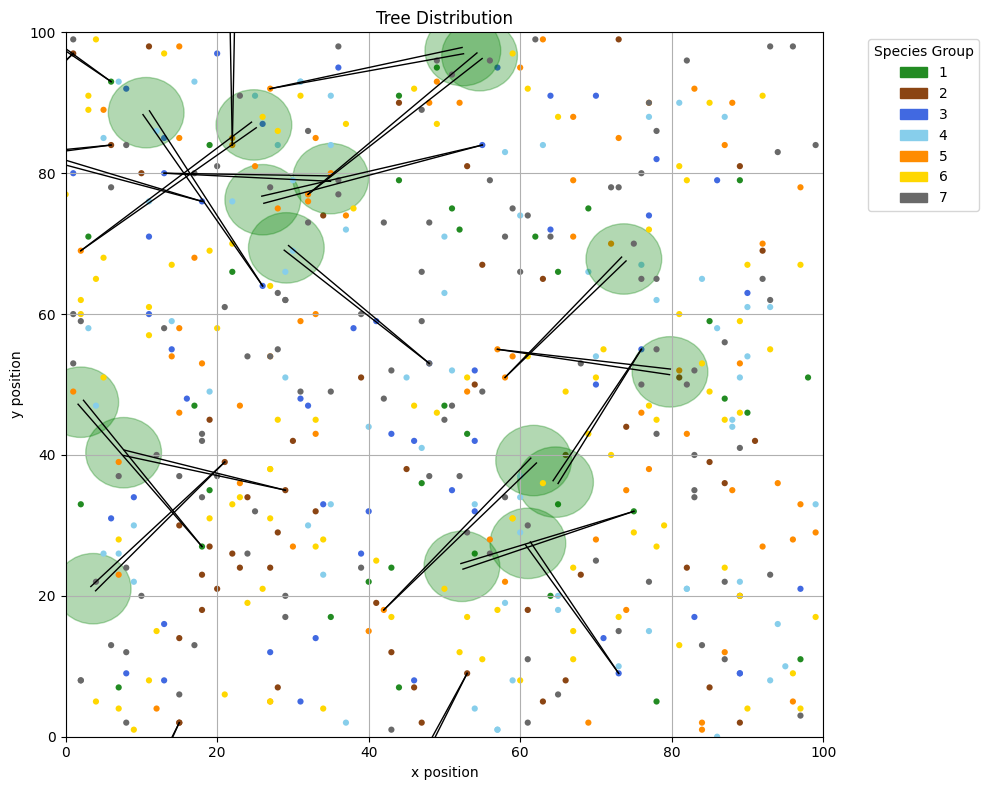

Cut Trees: 23


In [38]:
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math

def negative_cope(darjah):
    return max(1.0001, darjah)

# You need to load your data first - example:
# import pandas as pd
# data = pd.read_csv('your_file.csv').to_dict('records')
# or however you're loading your data

selected_block_num = '1'
# Filter only trees in BlockX == 1
filtered_data = [row for row in data if row['BlockX'].strip() == selected_block_num and row['BlockY'].strip() == selected_block_num]
x_coords = [int(row['x']) for row in filtered_data]
y_coords = [int(row['y']) for row in filtered_data]

spgroup_colors = {
    "1": "#228B22",
    "2": "#8B4513", 
    "3": "#4169E1",
    "4": "#87CEEB",
    "5": "#FF8C00",
    "6": "#FFD700",
    "7": "#696969"
}

colors = [spgroup_colors.get(row['spgroup'], "#000000") for row in filtered_data]

# Plot
plt.figure(figsize=(10, 8))

cut_tree = 0

# Process each tree individually
for i, row in enumerate(filtered_data):
    x = int(row['x'])
    y = int(row['y'])
    color = colors[i]
    
    # Default marker properties
    marker = 'o'
    size = 20
    edgecolor = 'none'
    
    # Check for damages and modify marker
    damage_stem = row['Damage STEM'].strip()
    damage_crown = row['Damage Crown'].strip()
    
    has_stem_damage = damage_stem and float(damage_stem) > 0
    has_crown_damage = damage_crown and float(damage_crown) > 0
    
    # if has_stem_damage and has_crown_damage:
    #     marker = 'X'  # X marker if both damages
    #     edgecolor = 'purple'
    #     size = 60
    # elif has_stem_damage:
    #     marker = 's'  # square marker for STEM damage
    #     edgecolor = 'red'
    #     size = 50
    # elif has_crown_damage:
    #     marker = 'D'  # diamond marker for CROWN damage
    #     edgecolor = 'orange'
    #     size = 50
    
    # Plot individual tree
    plt.scatter(x, y, c=color, s=size, marker=marker, edgecolors=edgecolor)
    
    # Draw cut direction lines if tree is marked for cutting
    if row['status'].strip().upper() == 'CUT':
        cut_tree += 1
        angle_deg = float(row['Damage(Cut angle)'].strip())
        height = float(row['Stem Height'])
        
        print(f"Tree {i+1}: angle: {angle_deg}°, height: {height}")
        
        # Calculate line endpoints for cutting direction (±1 degree spread)
        angle_rad_center = math.radians((90 - angle_deg) % 360)
        angle_rad_upper = math.radians((90 - (angle_deg + 1)) % 360)
        angle_rad_lower = math.radians((90 - (angle_deg - 1)) % 360)
        
        # Calculate endpoints
        dx_center = height * math.cos(angle_rad_center)
        dy_center = height * math.sin(angle_rad_center)
        
        dx_upper = height * math.cos(angle_rad_upper)
        dy_upper = height * math.sin(angle_rad_upper)
        
        dx_lower = height * math.cos(angle_rad_lower)
        dy_lower = height * math.sin(angle_rad_lower)
        
        # Draw cutting direction lines
        plt.plot([x, x + dx_upper], [y, y + dy_upper], color='black', linewidth=1)
        plt.plot([x, x + dx_lower], [y, y + dy_lower], color='black', linewidth=1)
        
        # Draw crown AOE circle
        crown_center = (x + dx_center, y + dy_center)
        crown_circle = Circle(crown_center, radius=5, color='green', alpha=0.3, edgecolor='black', linewidth=1)
        plt.gca().add_patch(crown_circle)

# Create legend
legend_handles = [mpatches.Patch(color=color, label=group) for group, color in spgroup_colors.items()]
plt.legend(handles=legend_handles, title="Species Group", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('x position')
plt.ylabel('y position')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Tree Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Cut Trees: {cut_tree}")